In [61]:
%run OmniglotInceptionV3ClusterAndClassify.py

In [2]:
%matplotlib inline

In [3]:
random_state=0
N=10

# Save inception v3 features

Omniglot images were adapted to fit the input of an InceptionV3 network.
The gray-scale channel is repeated for each RGB channel.
The image is resized to 139x139 pixels (minimum size for inception)

In [4]:
# see omniglot_inceptionV3_features.py

# Cluster and classification of inceptionV3 features


I noticed that when doing toy experiments with fixed features, it is the same as doing the clustering and classification separately because the clustering won't change while the input features don't change.
It will change once I adjust the CNN but it is not the case right now.

So I decided to implement it using scikit learn blocks to easily(==fast to code) do a grid search over number of clusters and regularization weights. I also tested a simple softmax and the prototypical network way.


## Comparison over multiple episodes

In [5]:
epi = 200
random_state=0

In [6]:
# result10way = run_multiple_class_subsets(10, epi)

In [7]:
epi = 100
random_state=0

In [8]:
# result10way = run_multiple_class_subsets(10, epi)

In [92]:
# result10way = pd.read_pickle("OmniglotInceptionV3ClusterAndClassify/N%dclasses_%depi/results.pd.pkl" % (10, 200))
result10way = pd.read_pickle("OmniglotInceptionV3ClusterAndClassify/N%dclasses_%depi/results.pd.pkl" % (10, 100))

In [93]:
res = result10way
[(k,v.shape) for k,v in result10way.items()]

[('l2_noclassweight', (100, 38)),
 ('single_prototype', (100, 1)),
 ('softmax', (100, 32)),
 ('l2_noshortcut', (100, 38)),
 ('l1_plain', (100, 39)),
 ('l2_plain', (100, 38))]

In [94]:
fixed_order = result10way.items()
names = tuple([k for k, res in fixed_order])
measurements = tuple([res.holdout_test_accuracy.values for k, res in fixed_order])
#_, p = friedmanchisquare(*measurements)
F, p, ranks, pivots = friedman_test(*measurements)
pivots_dict = dict(list(zip(names,pivots)))
comparisons, z_values, p_values, adj_p_values = nemenyi_multitest(pivots_dict)
df = pd.DataFrame({'comparisons': comparisons, 'p_values': p_values, 'adj_p_values': adj_p_values})
df.loc[df.adj_p_values>=0.05, : ]

adj_p_values                        comparisons  p_values
13           1.0  single_prototype vs l2_noshortcut  0.545350
14           1.0               l1_plain vs l2_plain  0.894757

In [12]:
test = test_all_pairs(result10way)
for k, v in test.items():
    if v['wilcoxon'] >= 0.05:
        print('"same": ', k)

"same":  ('single_prototype', 'l2_noshortcut')
"same":  ('l1_plain', 'l2_plain')


In [13]:
for k, df in result10way.items():
    print(k, df.holdout_test_accuracy.mean(), df.holdout_test_accuracy.std())

l2_noclassweight 0.7825 0.07107223526991836
single_prototype 0.8704999999999998 0.04704124560296834
softmax 0.9291000000000001 0.03545077680048175
l2_noshortcut 0.8721000000000001 0.050857197577673756
l1_plain 0.8341000000000001 0.06681944615034147
l2_plain 0.8364 0.06694668465173302


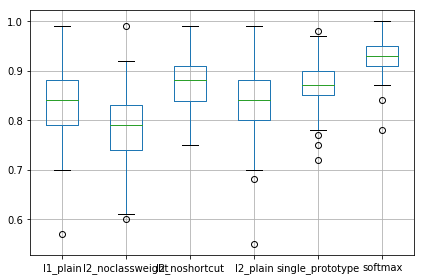

In [77]:
plot_data = dict([(k, df.holdout_test_accuracy) for k, df in result10way.items()])
for k, df in result10way.items():
    plot_data[k].index = np.arange(0,len(plot_data[k].index))
plot_data = pd.DataFrame(plot_data)
plt.figure()
plot_data.boxplot()
plt.tight_layout()

most chosen value for shortcut was  0.0001


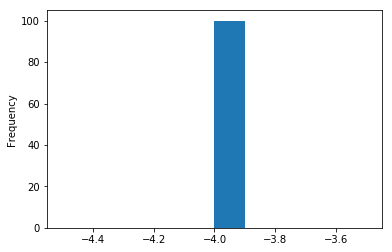

In [15]:
res = result10way['l2_noclassweight']
print("most chosen value for shortcut was ",
    res.param_classify__shortcut.mode().values[0])
plt.figure()
s = res.param_classify__shortcut.apply(np.float64).apply(np.log10)
s.plot.hist()

most chosen value for n_clusters was  30


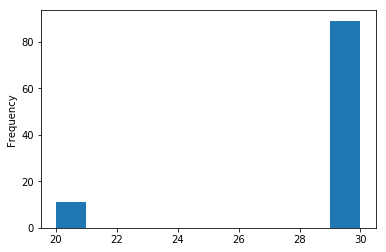

In [16]:
res = result10way['l2_plain']
print("most chosen value for n_clusters was ",
    res.param_cluster__n_clusters.mode().values[0])
plt.figure()
res.param_cluster__n_clusters.plot.hist()

most chosen value for class_weight was  2.0


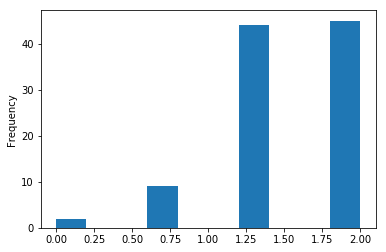

In [17]:
res = result10way['l2_noshortcut']
print("most chosen value for class_weight was ",
    res.param_cluster__class_weight.mode().values[0])
plt.figure()
res.param_cluster__class_weight.plot.hist()

most chosen value for n_clusters was  10


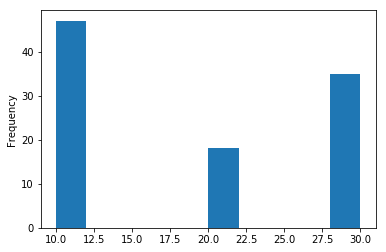

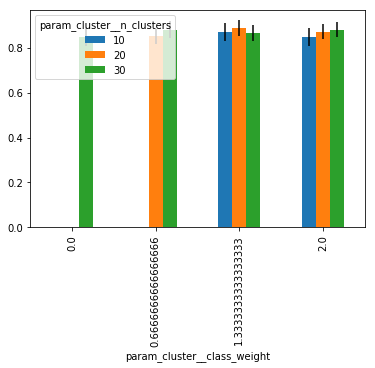

In [116]:
res = result10way['l2_noshortcut']
print("most chosen value for n_clusters was ",
    res.param_cluster__n_clusters.mode().values[0])
plt.figure()
res.param_cluster__n_clusters.plot.hist()
plt.figure()
t = res.pivot_table(columns=['param_cluster__n_clusters'],
                    index=['param_cluster__class_weight'], 
                    values='mean_test_score')
terr = res.pivot_table(columns=['param_cluster__n_clusters'],
                       index=['param_cluster__class_weight'], 
                       values='std_test_score')
t.plot.bar(yerr=terr)

In [18]:
# random_state = 0
# result20way = run_multiple_class_subsets(20, episodes=100)

In [88]:
result20way = pd.read_pickle("OmniglotInceptionV3ClusterAndClassify/N%dclasses_%depi/results.pd.pkl" % (20, 100))

In [89]:
result20way.keys()

dict_keys(['l2_noclassweight', 'single_prototype', 'softmax', 'l2_noshortcut', 'l1_plain', 'l2_plain'])

In [90]:
test = test_all_pairs(result20way)
for k, v in test.items():
    if v['wilcoxon'] >= 0.05:
        print('same: ', k)

In [91]:
fixed_order = result20way.items()
names = tuple([k for k, res in fixed_order])
measurements = tuple([res.holdout_test_accuracy.values for k, res in fixed_order])
#_, p = friedmanchisquare(*measurements)
F, p, ranks, pivots = friedman_test(*measurements)
pivots_dict = dict(list(zip(names,pivots)))
comparisons, z_values, p_values, adj_p_values = nemenyi_multitest(pivots_dict)
df = pd.DataFrame({'comparisons': comparisons, 'p_values': p_values, 'adj_p_values': adj_p_values})
df.loc[df.adj_p_values>=0.05, : ]

adj_p_values                        comparisons  p_values
13      0.057524       l2_noclassweight vs l1_plain  0.003835
14      1.000000  single_prototype vs l2_noshortcut  0.075662

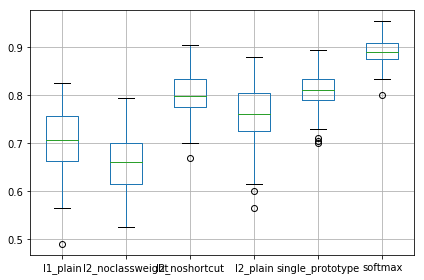

In [23]:
plot_data = dict([(k, df.holdout_test_accuracy) for k, df in result20way.items()])
for k, df in result20way.items():
    plot_data[k].index = np.arange(0,len(plot_data[k].index))
plot_data = pd.DataFrame(plot_data)
plt.figure()
plot_data.boxplot()
plt.tight_layout()

In [26]:
for k, df in result20way.items():
    print(k, df.holdout_test_accuracy.mean(), df.holdout_test_accuracy.std())
    

l2_noclassweight 0.6592 0.05896720540377773
single_prototype 0.8097499999999997 0.038907913816802836
softmax 0.8911999999999999 0.027789977119149066
l2_noshortcut 0.8004000000000002 0.04456682645423633
l1_plain 0.7056999999999999 0.06669325227479839
l2_plain 0.75775 0.0603164006039666


most chosen value for class_weight was  2.0


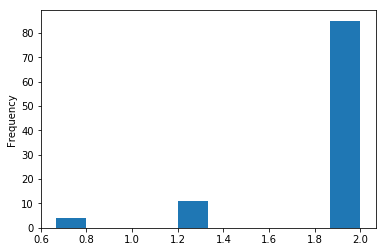

In [27]:
res = result20way['l2_noshortcut']
print("most chosen value for class_weight was ",
    res.param_cluster__class_weight.mode().values[0])
plt.figure()
res.param_cluster__class_weight.plot.hist()

most chosen value for n_clusters was  20


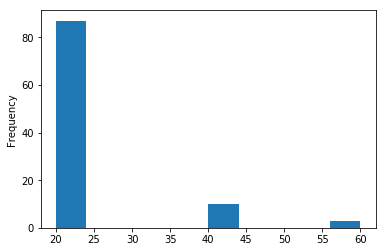

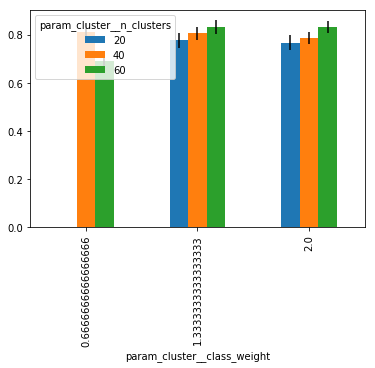

In [117]:
res = result20way['l2_noshortcut']
print("most chosen value for n_clusters was ",
    res.param_cluster__n_clusters.mode().values[0])
plt.figure()
res.param_cluster__n_clusters.plot.hist()
plt.figure()
t = res.pivot_table(columns=['param_cluster__n_clusters'],
                    index=['param_cluster__class_weight'], 
                    values='mean_test_score')
terr = res.pivot_table(columns=['param_cluster__n_clusters'],
                       index=['param_cluster__class_weight'], 
                       values='std_test_score')
t.plot.bar(yerr=terr)

In [28]:
# random_state = 0
# result20way = run_multiple_class_subsets(30, episodes=100)

In [81]:
N=30
result30way = pd.read_pickle("OmniglotInceptionV3ClusterAndClassify/N%dclasses_%depi/results.pd.pkl" % (30, 100))

In [82]:
fixed_order = result30way.items()
names = tuple([k for k, res in fixed_order])
measurements = tuple([res.holdout_test_accuracy.values for k, res in fixed_order])
#_, p = friedmanchisquare(*measurements)
F, p, ranks, pivots = friedman_test(*measurements)
pivots_dict = dict(list(zip(names,pivots)))
comparisons, z_values, p_values, adj_p_values = nemenyi_multitest(pivots_dict)
df = pd.DataFrame({'comparisons': comparisons, 'p_values': p_values, 'adj_p_values': adj_p_values})
df.loc[df.adj_p_values>=0.05, : ]

adj_p_values                comparisons  p_values
14      0.881726  l2_noshortcut vs l2_plain  0.058782

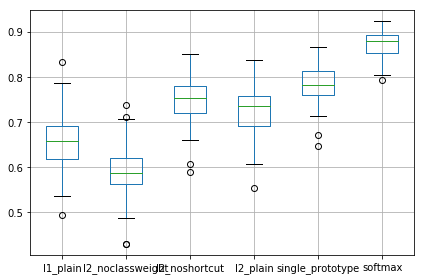

In [83]:
plot_data = dict([(k, df.holdout_test_accuracy) for k, df in result30way.items()])
for k, df in result30way.items():
    plot_data[k].index = np.arange(0,len(plot_data[k].index))
plot_data = pd.DataFrame(plot_data)
plt.figure()
plot_data.boxplot()
plt.tight_layout()

most chosen value for n_clusters was  30


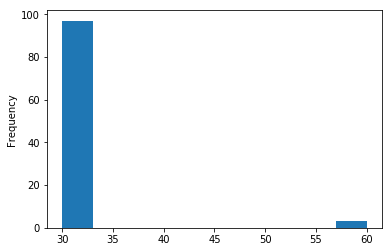

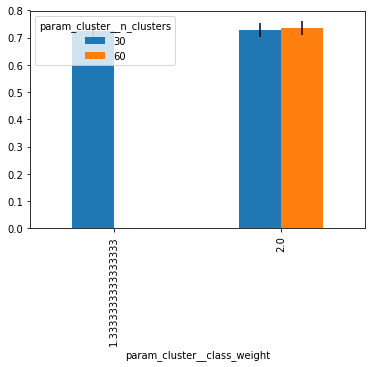

In [118]:
res = result30way['l2_noshortcut']
print("most chosen value for n_clusters was ",
    res.param_cluster__n_clusters.mode().values[0])
plt.figure()
res.param_cluster__n_clusters.plot.hist()
plt.figure()
t = res.pivot_table(columns=['param_cluster__n_clusters'],
                    index=['param_cluster__class_weight'], 
                    values='mean_test_score')
terr = res.pivot_table(columns=['param_cluster__n_clusters'],
                       index=['param_cluster__class_weight'], 
                       values='std_test_score')
t.plot.bar(yerr=terr)

In [32]:
from matplotlib import rc
import matplotlib
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
# %matplotlib inline

In [95]:
# methods, acc x N classes
methods=['l1_plain', 'l2_plain','l2_noclassweight', 'l2_noshortcut','single_prototype', 'softmax',]
methods_labels={'l1': r'L1 w $\alpha,\beta \neq 0$',
                'l2': r'L2 w $\alpha,\beta \neq 0$',
                'l1_plain': r'L1', 
                'l2_plain': r'L2',
                'single_prototype': 'nearest centroids', 
                'softmax': 'softmax',
                'l2_noclassweight': r'L2 with $\tilde{x}$ ($\alpha=0$)',
                'l2_noshortcut': r'L2 with $\beta$ term'}
N = {10:result10way, 20:result20way,30:result30way}
x = list(N.keys())
x.sort()

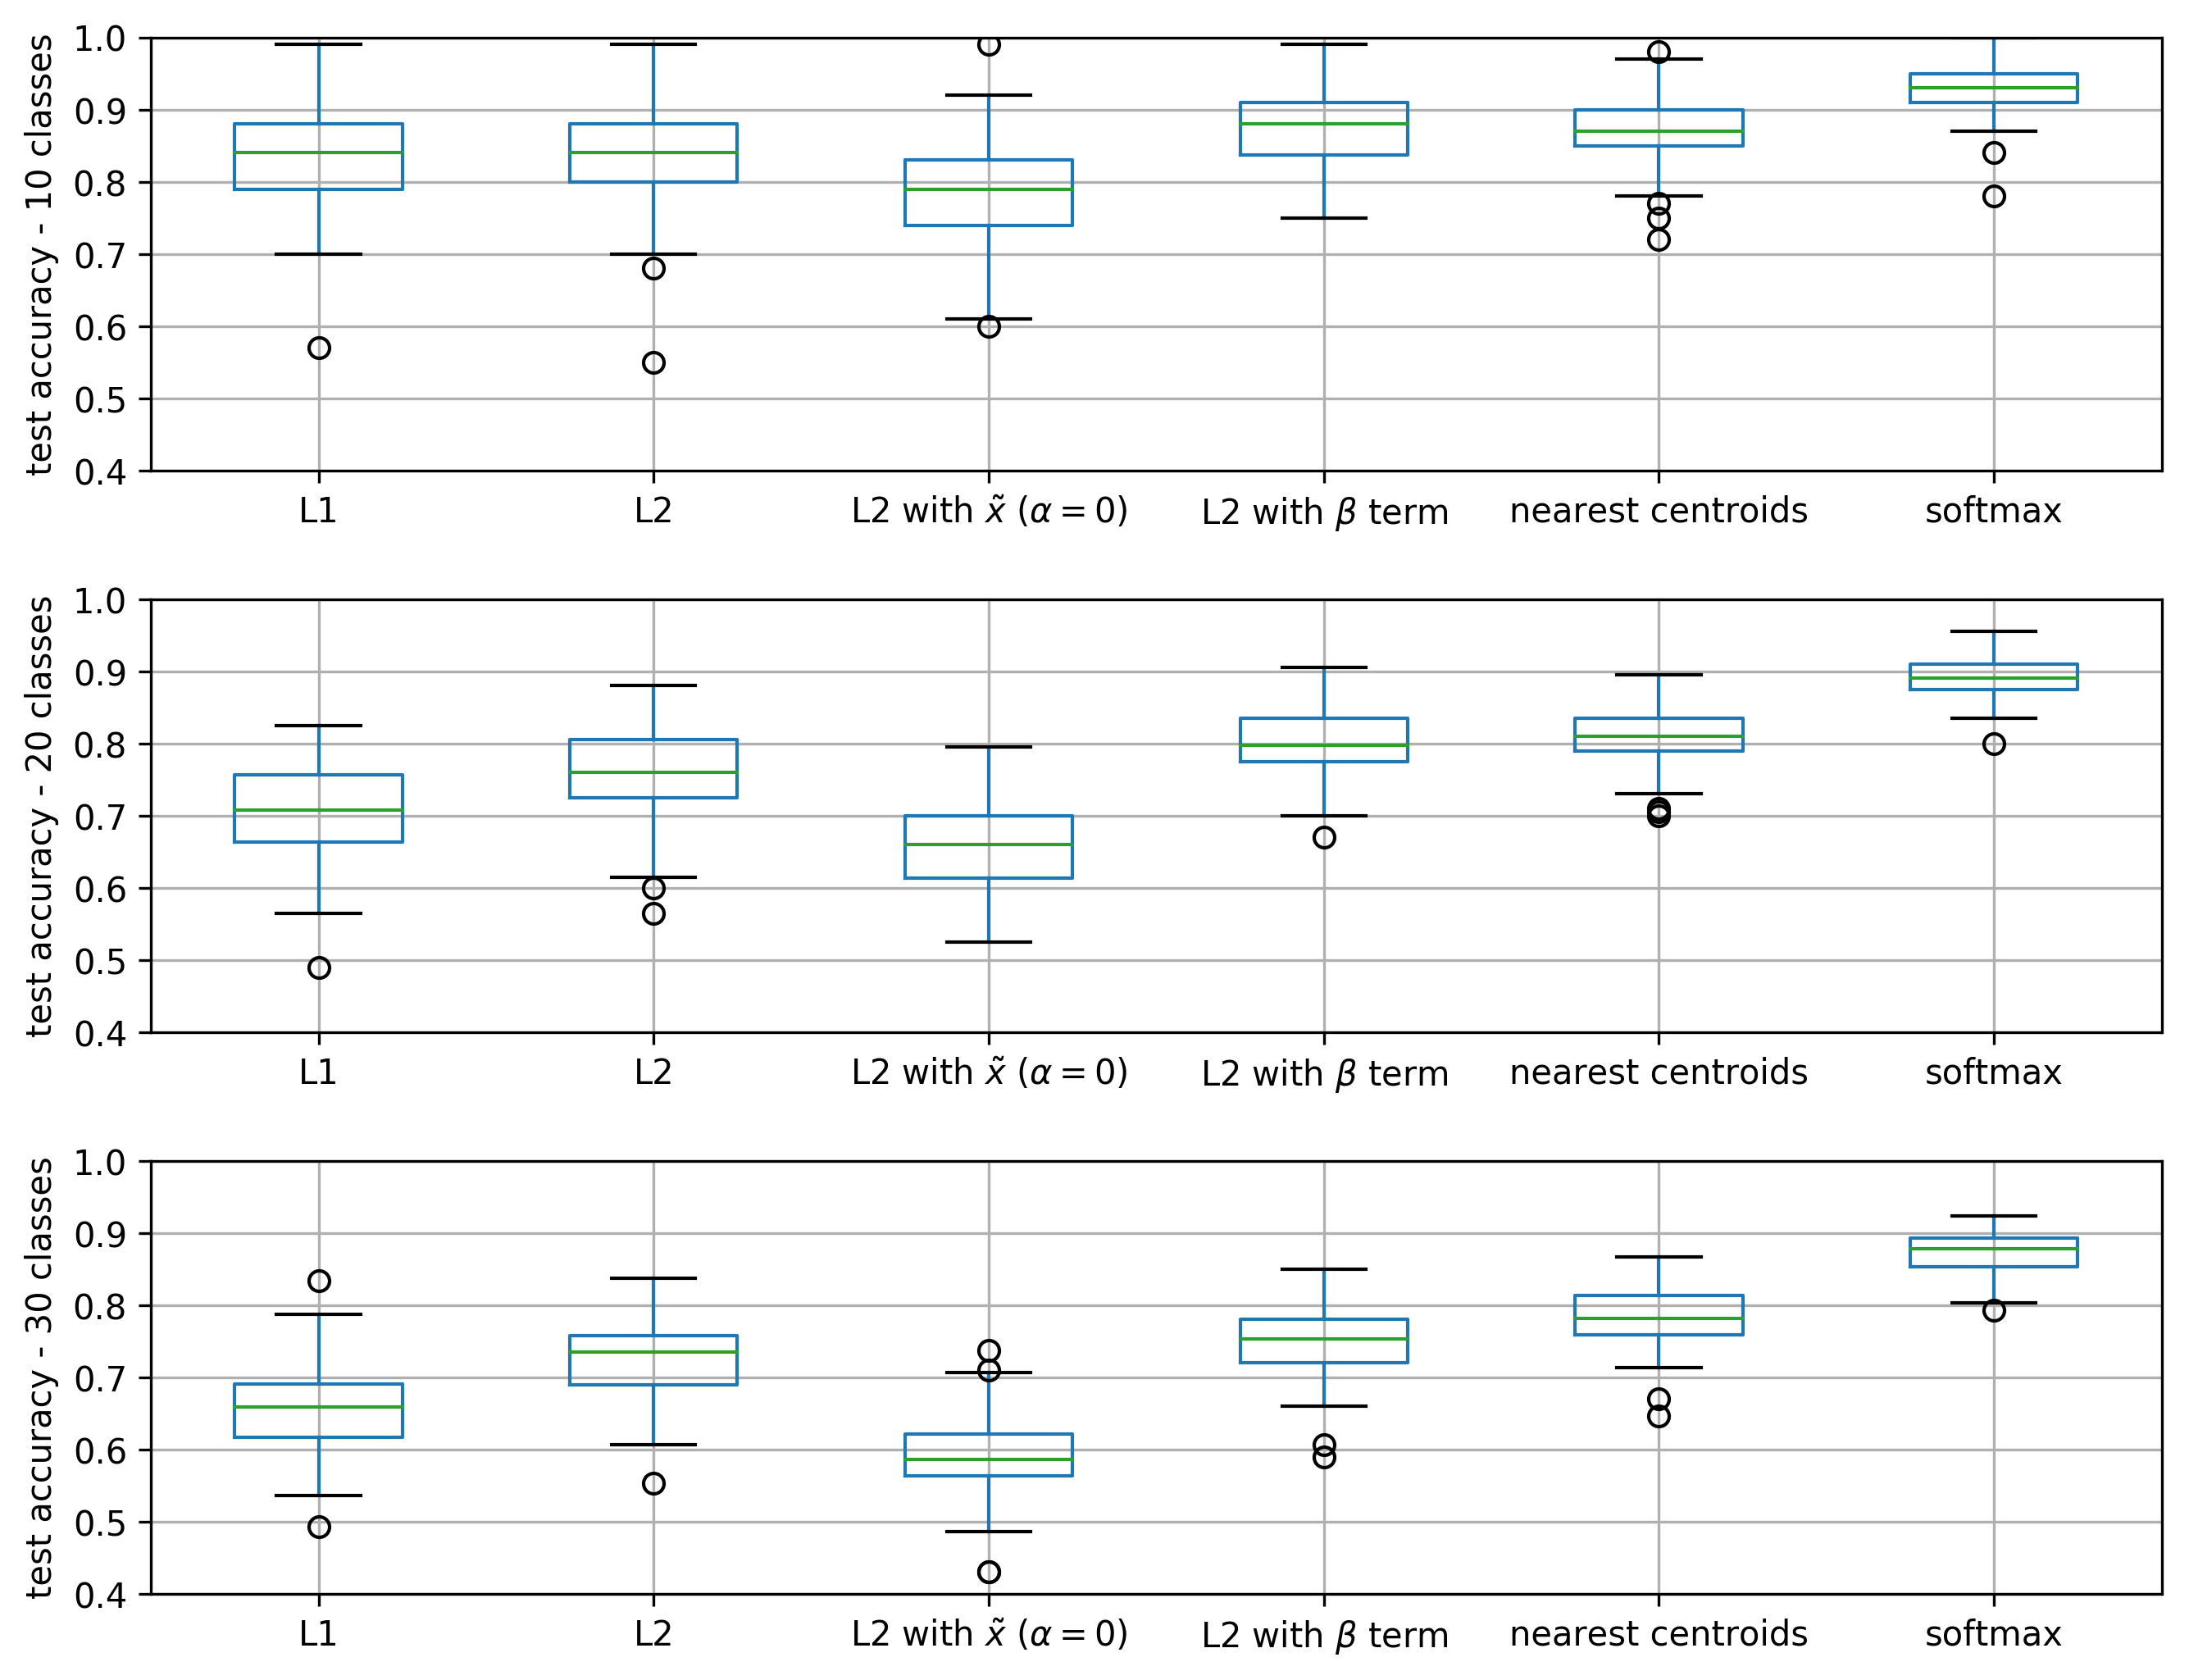

In [96]:
plt.figure(figsize=(9,7),dpi=300)
for i, n in enumerate(x):
    plot_data = dict([(k, df.holdout_test_accuracy) for k, df in N[n].items()])
    for k, df in N[n].items():
            plot_data[k].index = np.arange(0,len(plot_data[k].index))
    plot_data = pd.DataFrame(plot_data, columns=methods)
    plt.subplot(3,1,i+1)
    plot_data.boxplot()
    locs, labels = plt.xticks()
    labels = [methods_labels[m.get_text()] for m in labels]
    plt.xticks(locs,labels)
    plt.ylabel('test accuracy - %d classes' % n)
    plt.ylim(0.4,1.0)
plt.tight_layout()
plt.savefig("OmniglotInceptionV3ClusterAndClassify/box_plots.eps")

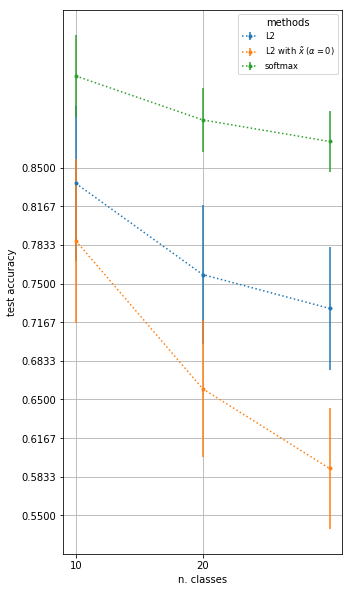

In [113]:
plt.figure(figsize=(5,10))

for i, m in enumerate(['l2_plain','l2_noclassweight','softmax']):
    means = []
    stds = []
    for n in x:
        means.append(N[n][m].holdout_test_accuracy.mean())
        stds.append(N[n][m].holdout_test_accuracy.std())
    means = np.array(means)
    stds = np.array(stds)
    plt.errorbar(x, means, stds, fmt=':.', label=methods_labels[m])
plt.legend(loc='best', fontsize='small', title='methods')
plt.xticks(np.arange(10,20+1,10))
plt.xlabel('n. classes')
plt.ylabel('test accuracy')
plt.grid(which='both',axis='both')
plt.yticks(np.linspace(0.55,0.85, 10))
plt.savefig("OmniglotInceptionV3ClusterAndClassify/means_std_n_classes.eps")